# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diamonds = pd.read_csv(r'C:\Users\Utilisateur\Desktop\Project 4\diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds


Unnamed: 0.1  carat        cut color clarity  depth  table  price  \
0                 1   0.23      Ideal     E     SI2   61.5   55.0    326   
1                 2   0.21    Premium     E     SI1   59.8   61.0    326   
2                 3   0.23       Good     E     VS1   56.9   65.0    327   
3                 4   0.29    Premium     I     VS2   62.4   58.0    334   
4                 5   0.31       Good     J     SI2   63.3   58.0    335   
...             ...    ...        ...   ...     ...    ...    ...    ...   
53934         53936   0.72      Ideal     D     SI1   60.8   57.0   2757   
53935         53937   0.72       Good     D     SI1   63.1   55.0   2757   
53936         53938   0.70  Very Good     D     SI1   62.8   60.0   2757   
53937         53939   0.86    Premium     H     SI2   61.0   58.0   2757   
53938         53940   0.75      Ideal     D     SI2   62.2   55.0   2757   

          x     y     z  num_clarity  num_color  
0      3.95  3.98  2.43            1          5  
1      3.89  3.84  2.31            2          5  
2      4.05  4.07  2.31            4          5  
3      4.20  4.23  2.63            3          1  
4      4.34  4.35  2.75            1          0  
...     ...   ...   ...          ...        ...  
53934  5.75  5.76  3.50            2          6  
53935  5.69  5.75  3.61            2          6  
53936  5.66  5.68  3.56            2          6  
53937  6.15  6.12  3.74            1          2  
53938  5.83  5.87  3.64            1          6  

[53939 rows x 13 columns]

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [4]:
#your code here
diamonds.describe()

Unnamed: 0.1         carat         depth         table         price  \
count  53939.000000  53939.000000  53939.000000  53939.000000  53939.000000   
mean   26970.553811      0.797917     61.749458     57.457192   3932.646267   
std    15571.420425      0.473987      1.432582      2.234510   3989.317520   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.500000      0.400000     61.000000     56.000000    950.000000   
50%    26971.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.500000      1.040000     62.500000     59.000000   5324.000000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z   num_clarity     num_color  
count  53931.000000  53932.000000  53932.000000  53939.000000  53939.000000  
mean       5.731964      5.733907      3.539623      3.051058      3.405829  
std        1.119634      1.111750      0.691807      1.647128      1.701110  
min        3.730000      3.680000      1.070000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000      2.000000      2.000000  
50%        5.700000      5.710000      3.530000      3.000000      3.000000  
75%        6.540000      6.540000      4.040000      4.000000      5.000000  
max       10.740000     11.419579      6.980000      7.000000      6.000000

In [4]:
#your comments here

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
# there is many features that affect most price

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [5]:
#your code here
#diamonds.groupby(diamonds['color'])['carat', 'depth', 'table', 'price' , 'x', 'y', 'z' ,'num_clarity'].mean()
diamonds.groupby('color').agg('mean')

Unnamed: 0.1     carat      depth      table        price         x  \
color                                                                        
D      28119.168118  0.657795  61.698125  57.404590  3169.954096  5.417851   
E      28791.322139  0.657867  61.662090  57.491201  3076.752475  5.411580   
F      27624.460176  0.736538  61.694582  57.433536  3724.886397  5.616727   
G      27725.462983  0.771190  61.757111  57.288629  3999.135671  5.678549   
H      24586.114296  0.911668  61.837203  57.517873  4485.739010  5.984522   
I      24951.123202  1.026927  61.846385  57.577278  5091.874954  6.222826   
J      23538.721866  1.162137  61.887215  57.812393  5323.818020  6.519338   

              y         z  num_clarity  num_color  
color                                              
D      5.421928  3.343320     2.691513        6.0  
E      5.416949  3.337767     2.969889        5.0  
F      5.620634  3.465788     3.133934        4.0  
G      5.681198  3.507966     3.463425        3.0  
H      5.979882  3.698622     2.933879        2.0  
I      6.222730  3.846369     2.964035        1.0  
J      6.518105  4.033251     2.776353        0.0

**What do you see? Pay special attention to the relationship between price and color.**

In [8]:
#your thoughts here
#there is a negative correlation between color & price

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

<AxesSubplot:>

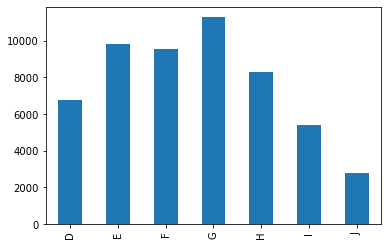

In [6]:
#your code here
diamonds['color'].value_counts().sort_index().plot.bar()

In [10]:
#your comments here
# less distribution in J color

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [12]:
#your code here
diamonds.groupby(diamonds['carat'])['depth', 'table', 'price' , 'x', 'y', 'z' ,'num_clarity'].mean()

<ipython-input-12-6ecf53ad9295>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diamonds.groupby(diamonds['carat'])['depth', 'table', 'price' , 'x', 'y', 'z' ,'num_clarity'].mean()


depth      table         price          x          y         z  \
carat                                                                       
0.20   61.100000  59.333333    365.166667   3.786667   3.753333  2.303333   
0.21   60.511111  58.444444    380.222222   3.874444   3.837778  2.332222   
0.22   61.620000  60.400000    391.400000   3.898000   3.848000  2.386000   
0.23   61.426621  58.034130    486.143345   3.946382   3.973379  2.431468   
0.24   61.599213  57.488189    505.185039   3.990157   4.019331  2.465591   
...          ...        ...           ...        ...        ...       ...   
4.00   63.300000  58.000000  15984.000000  10.010000   9.940000  6.310000   
4.01   61.750000  61.500000  15223.000000  10.080000  10.020000  6.205000   
4.13   64.800000  61.000000  17329.000000  10.000000   9.850000  6.430000   
4.50   65.800000  58.000000  18531.000000  10.230000  10.160000  6.720000   
5.01   65.500000  59.000000  18018.000000  10.740000  10.540000  6.980000   

       num_clarity  
carat               
0.20      2.833333  
0.21      2.666667  
0.22      2.600000  
0.23      4.901024  
0.24      4.972441  
...            ...  
4.00      0.000000  
4.01      0.000000  
4.13      0.000000  
4.50      0.000000  
5.01      0.000000  

[273 rows x 7 columns]

In [7]:
#your comments
#carat has a strong correlation with the price,
#it seems the carat is not the only factor that affect the price


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<ipython-input-13-c6a84cdfb8ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diamonds.groupby(diamonds['carat'])['depth', 'table', 'price' , 'x', 'y', 'z' ,'num_clarity'].mean().plot()


<AxesSubplot:xlabel='carat'>

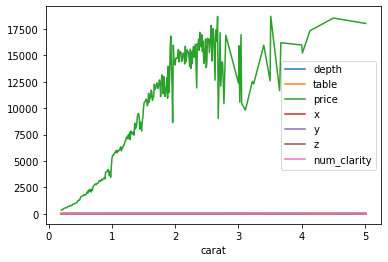

In [13]:
#your code here
diamonds.groupby(diamonds['carat'])['depth', 'table', 'price' , 'x', 'y', 'z' ,'num_clarity'].mean().plot()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [14]:
#your code here
diamonds.groupby(diamonds['table'])['carat','depth', 'price', 'x', 'y', 'z' ,'num_clarity'].mean()

<ipython-input-14-7b2eb60178e2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diamonds.groupby(diamonds['table'])['carat','depth', 'price', 'x', 'y', 'z' ,'num_clarity'].mean()


carat  depth    price      x      y      z  num_clarity
table                                                          
43.0   1.0400  62.90   4997.0  6.450  6.410  4.040         4.00
44.0   0.2900  62.80    474.0  4.200  4.240  2.650         4.00
49.0   0.6500  64.25   2290.5  5.355  5.320  3.425         3.00
50.0   1.5100  61.50   8995.5  7.380  7.295  4.510         2.00
50.1   0.9400  66.00   3353.0  6.130  6.170  4.060         1.00
...       ...    ...      ...    ...    ...    ...          ...
71.0   0.6800  58.00   1633.0  5.850  5.700  3.350         2.00
73.0   0.6025  68.90   2406.5  5.520  5.465  3.745         3.25
76.0   0.7900  65.30   2362.0  5.520  5.130  3.350         2.00
79.0   0.8100  68.80   2301.0  5.260  5.200  3.580         1.00
95.0   2.0100  58.60  13387.0  8.320  8.310  4.870         2.00

[127 rows x 7 columns]

In [18]:
#your comments here
#there probably is a positive correlation between table & price

**Finally, do the same with the `clarity` column.**

In [15]:
#your code here
diamonds.groupby(diamonds['clarity'])['carat','depth','table', 'price', 'x', 'y', 'z' ,'num_clarity'].mean()

<ipython-input-15-42e636af1313>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diamonds.groupby(diamonds['clarity'])['carat','depth','table', 'price', 'x', 'y', 'z' ,'num_clarity'].mean()


carat      depth      table        price         x         y  \
clarity                                                                    
I1       1.283846  62.734278  58.303779  3924.168691  6.761093  6.709379   
IF       0.505123  61.510615  56.507207  2864.839106  4.968402  4.989827   
SI1      0.850482  61.853042  57.662541  3996.001148  5.888383  5.888256   
SI2      1.077548  61.772479  57.927282  5062.251169  6.403973  6.394201   
VS1      0.727158  61.667458  57.315151  3839.455391  5.572860  5.580017   
VS2      0.763935  61.724417  57.417401  3924.989395  5.658633  5.659782   
VVS1     0.503321  61.624651  56.884460  2523.114637  4.961721  4.976437   
VVS2     0.596202  61.663778  57.024990  3283.737071  5.218454  5.232118   

                z  num_clarity  
clarity                         
I1       4.224688          0.0  
IF       3.061659          7.0  
SI1      3.640636          2.0  
SI2      3.951987          1.0  
VS1      3.437925          4.0  
VS2      3.492788          3.0  
VVS1     3.062132          6.0  
VVS2     3.221465          5.0

In [21]:
#your comments here
#there probably is a weak negative correlation between table & price

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

<AxesSubplot:>

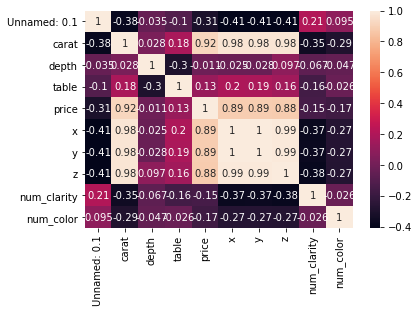

In [8]:
#your thoughts here
# carat, yes it matches the hypotheses
sns.heatmap(diamonds.corr(), annot=True)

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


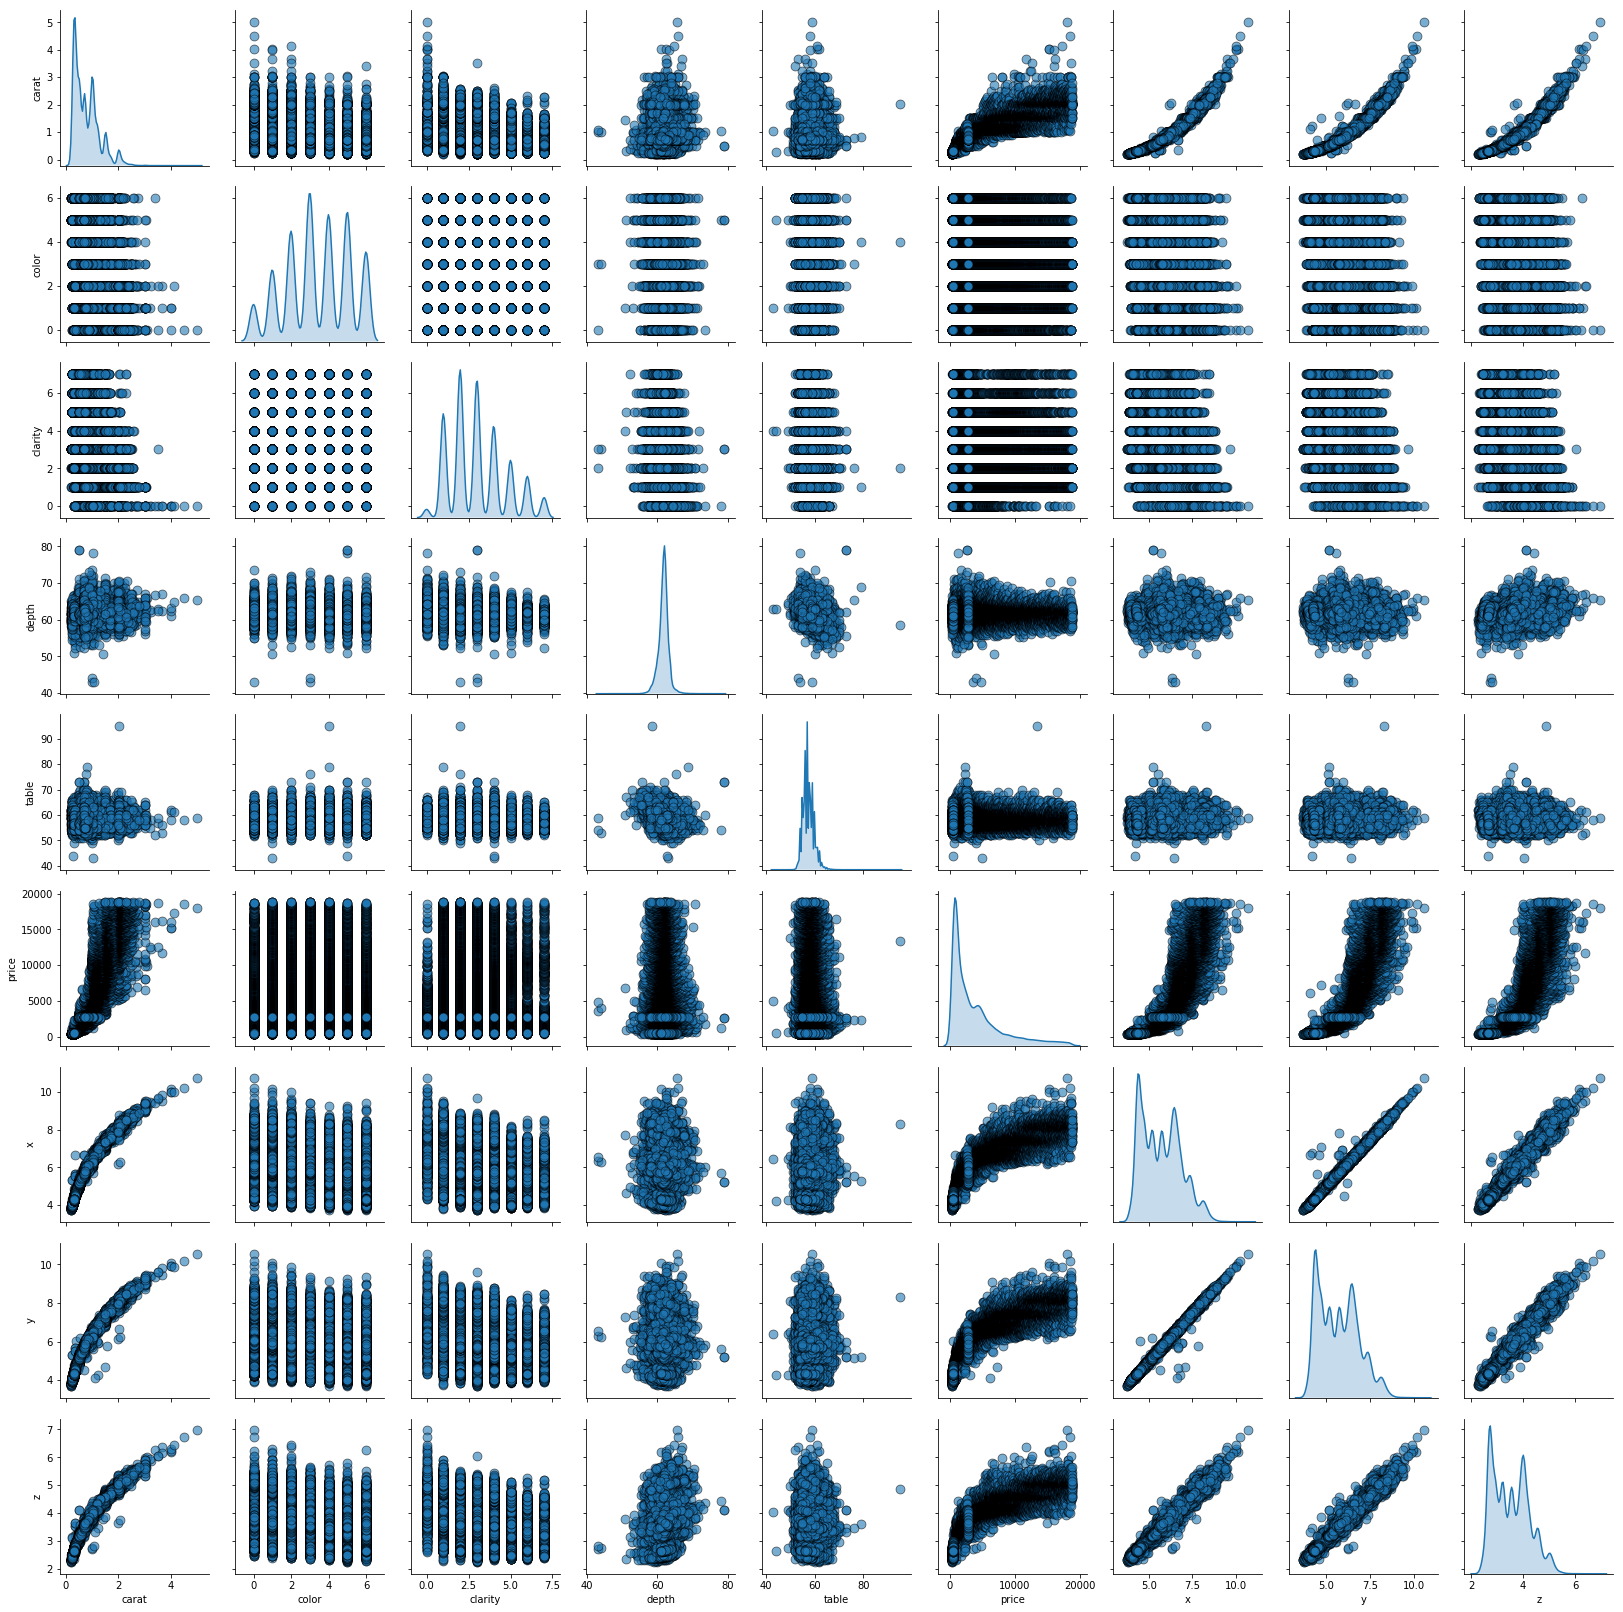

In [3]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
# between price & [carat, x, y, z]

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

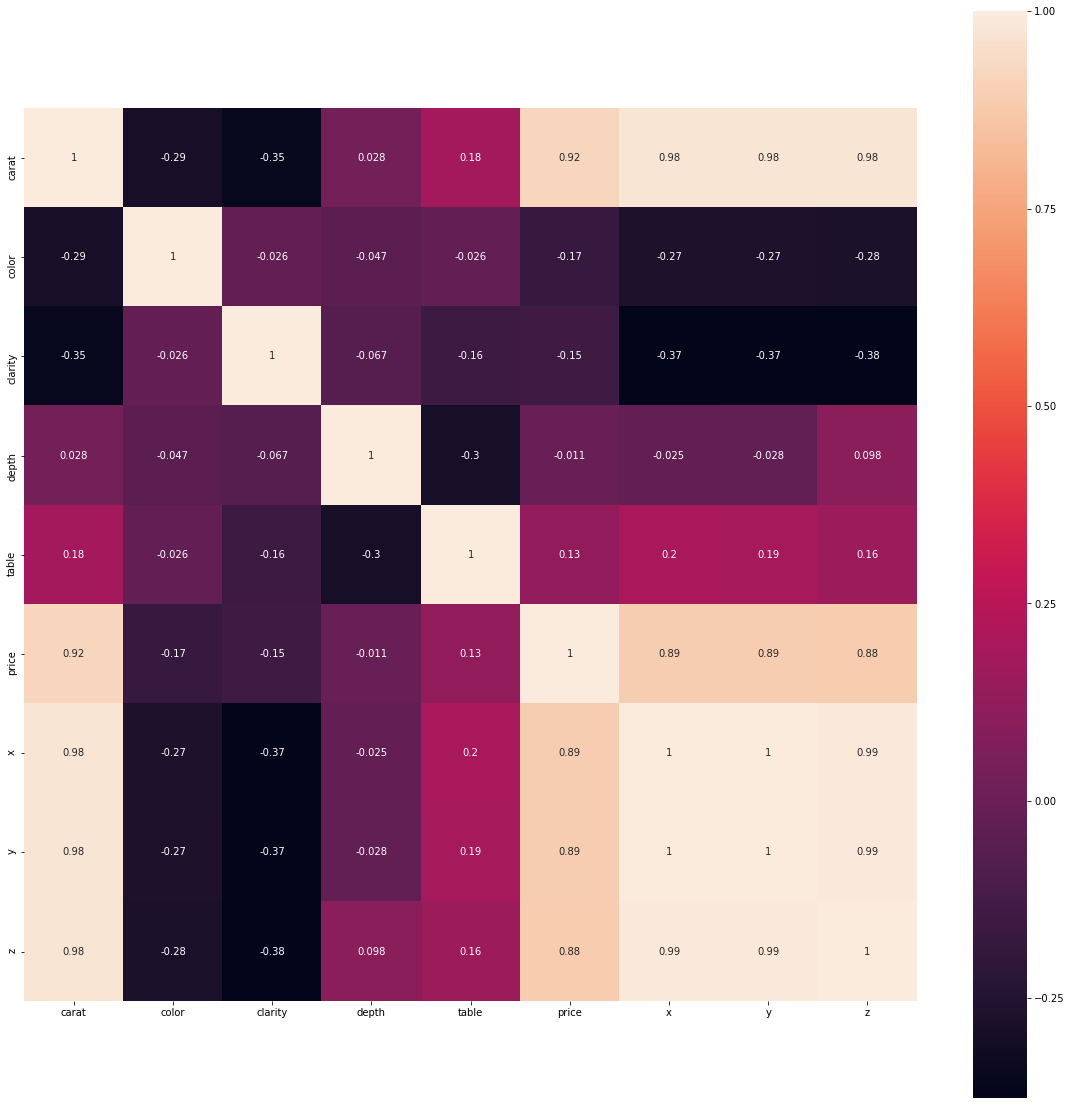

In [26]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

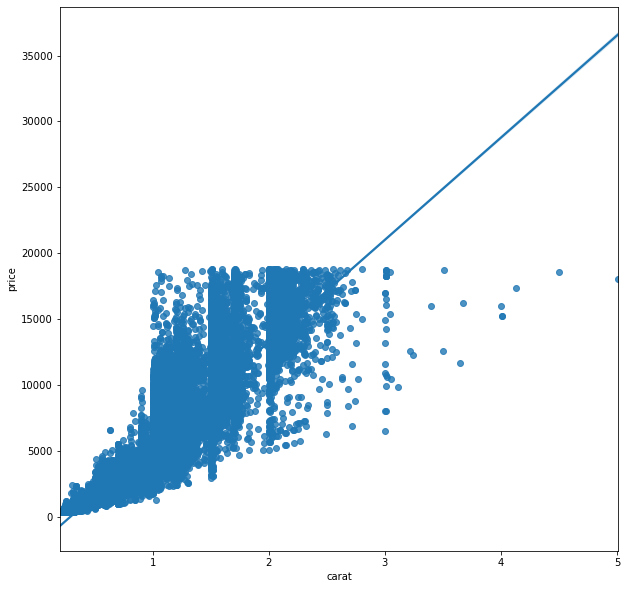

In [19]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [17]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493197767596089

**What do you think?**

In [30]:
#your thoughts here
# there is a stron correlation between carat & price

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
# for x, y, and z with price, the correlation is very strong

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.